In [8]:
import os
import sys
import yaml
from glob import glob
from copy import deepcopy
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from corner import corner

# enable use of local modules
repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.analysis import lensing
from mejiro.utils import util

# read configuration file
with open('config.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [2]:
if config['dev']:
    config['pipeline_dir'] += '_dev'

In [3]:
data_dir = os.path.join(config['data_dir'], config['pipeline_dir'], '03')

pickles = sorted(glob(os.path.join(data_dir, 'sca*', 'subhalos', 'subhalo_realization_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 1062 pickle(s) in /data/bwedig/mejiro/roman_hlwas_dev/03


In [5]:
sample_realization = util.unpickle(pickles[0])
print(sample_realization)

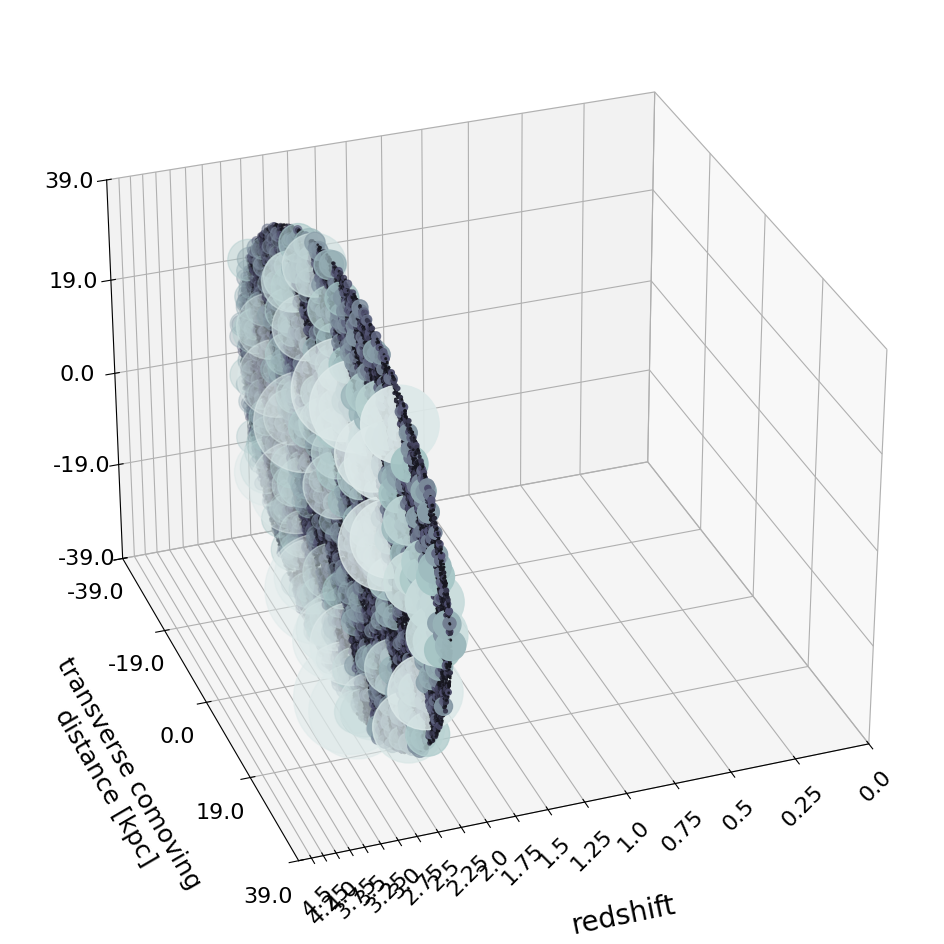

In [7]:
f = plt.figure(figsize=(14, 12))
ax = f.add_subplot(111, projection='3d')
sample_realization.plot(ax)

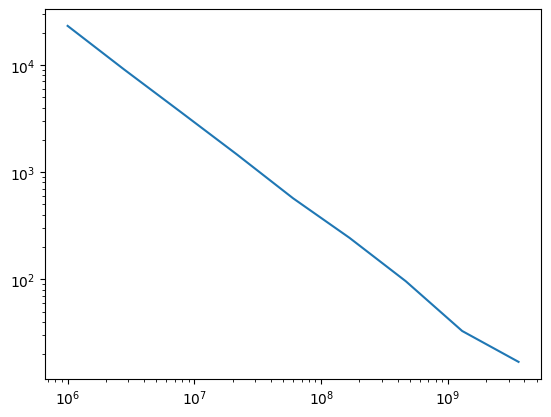

In [11]:
plt.loglog(*lensing.get_subhalo_mass_function(sample_realization))
plt.show()

In [10]:
largest_halo = max(sample_realization.halos, key=lambda halo: halo.mass)
print(f'Largest halo has mass {largest_halo.mass:.2e} Msun\n')

pprint(largest_halo.__dict__)

Largest halo has mass 8.80e+09 Msun

{'_args': {},
 '_c': 2.990542783120167,
 '_concentration_class': <pyHalo.Halos.concentration.ConcentrationLudlow object at 0x7f2ac2629b70>,
 '_kwargs_lenstronomy': [{'Rs': 0.5423224062,
                          'alpha_Rs': 0.006207630780815028,
                          'center_x': 0.0986,
                          'center_y': -1.4372,
                          'r_trunc': 0.2646539918761093}],
 '_lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f2ac27d9210>,
 '_mbound_galacticus_definition': 1270176562.1688306,
 '_nfw_params': [12070674.345272219, 4.504650149021987, 13.471348993638886],
 '_profile_args': (2.990542783120167, 2.19826937069168),
 '_rescale_norm': 0.7007569427537076,
 '_rescaled_once': True,
 '_time_since_infall': 0.9981679401763843,
 '_truncation_class': <pyHalo.Halos.tidal_truncation.TruncationGalacticus object at 0x7f2ac2649210>,
 '_z_infall': 3.7467494327253807,
 '_zeval': 3.7467494327253807,
 'fixed_position': False,
 